<a href="https://colab.research.google.com/github/Abdullah042973/AI-in-medical-domain/blob/main/better_cnn_update.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
 
config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 1
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)
 
 
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#data augmentation
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/covid xray and ct scan/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 6310 images belonging to 7 classes.


In [ ]:
# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/covid xray and ct scan/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 975 images belonging to 7 classes.


In [ ]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2

In [ ]:
def createmodel():
  # Part 2 - Building the CNN
  # Initialising the CNN
  cnn = tf.keras.models.Sequential()
  # Step 1 - Convolution
  cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))
  # Step 2 - Pooling
  cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
  # Adding a second convolutional layer
  cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
  cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
  # Step 3 - Flattening
  cnn.add(tf.keras.layers.Flatten())
  # Step 4 - Full Connection
  cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
  # Step 5 - Output Layer
  #cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
  cnn.add(Dense(7, kernel_regularizer=tf.keras.regularizers.l2(0.001),activation='softmax'))
  cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return cnn

model = createmodel()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 9

In [ ]:
model = createmodel()
r=model.fit(x = training_set, validation_data = test_set, epochs = 50)



Epoch 1/50
198/198 [==============================] - 3902s 20s/step - loss: 1.1316 - accuracy: 0.5310 - val_loss: 0.7101 - val_accuracy: 0.7087
Epoch 2/50
198/198 [==============================] - 122s 615ms/step - loss: 0.7162 - accuracy: 0.7158 - val_loss: 0.5654 - val_accuracy: 0.7856
Epoch 3/50
198/198 [==============================] - 126s 635ms/step - loss: 0.6315 - accuracy: 0.7445 - val_loss: 0.5046 - val_accuracy: 0.8390
Epoch 4/50
198/198 [==============================] - 125s 630ms/step - loss: 0.5853 - accuracy: 0.7706 - val_loss: 0.5470 - val_accuracy: 0.8246
Epoch 5/50
198/198 [==============================] - 123s 624ms/step - loss: 0.5582 - accuracy: 0.7769 - val_loss: 0.5046 - val_accuracy: 0.8482
Epoch 6/50
198/198 [==============================] - 124s 625ms/step - loss: 0.5284 - accuracy: 0.7878 - val_loss: 0.4962 - val_accuracy: 0.8267
Epoch 7/50
198/198 [==============================] - 122s 615ms/step - loss: 0.5355 - accuracy: 0.7910 - val_loss: 0.5097 - 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

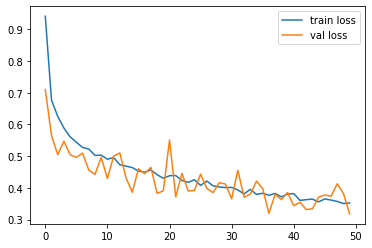

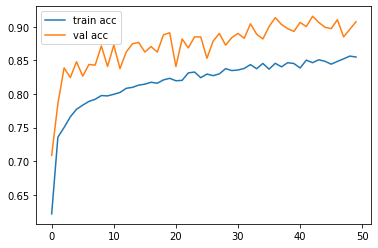

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/covid xray and ct scan/test/NORMAL/NORMAL2-IM-0007-0001.jpeg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
result[0]
for i in result[0]:
  result = i*100
  print(float(result))

0.010326167830498889
0.17498775850981474
98.82501363754272
0.12868932681158185
0.838035810738802
0.018947827629745007
0.004006523886346258


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/covid xray and ct scan/train/COVID 19/COVID-19 (116).png', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
result[0]
for i in result[0]:
  result = i*100
  print(float(result))

0.01348977821180597
99.95274543762207
2.0498575281635567e-05
9.391628452704026e-06
3.038924489828787e-06
0.03265284758526832
0.00108745189209003


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/drive/MyDrive/X-ray and CT scan ( binary classification )/TESTING/non-covid/IM-0131-0001.jpeg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
result[0]
for i in result[0]:
  result = i*100
  print(float(result))

3.980309060125364e-06
3.311293710339669e-05
99.29531216621399
0.37310903426259756
0.33153926488012075
1.8147663372047873e-07
2.9424851888393277e-06


In [ ]:
final_accuracy = r.history["val_accuracy"][-15:]
print("FINAL ACCURACY MEAN-15: ", np.mean(final_accuracy))

FINAL ACCURACY MEAN-15:  0.9023589730262757


In [ ]:
import tensorflow as tf
 
from keras.models import load_model
 
model.save('better_cnn_model_50_epoch.h5')